In [2]:
import pandas as pd
from google.colab import files

In [3]:
upload = files.upload()

Saving train.csv to train.csv


# home 인코딩

In [4]:
home = pd.read_csv('train.csv')
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [5]:
T = home[home['허위매물여부']==0]
F = home[home['허위매물여부']==1]

In [6]:
T.info()
F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2154 non-null   object 
 1   매물확인방식  2154 non-null   object 
 2   보증금     2154 non-null   float64
 3   월세      2154 non-null   int64  
 4   전용면적    1506 non-null   float64
 5   해당층     1978 non-null   float64
 6   총층      2142 non-null   float64
 7   방향      2154 non-null   object 
 8   방수      2142 non-null   float64
 9   욕실수     2140 non-null   float64
 10  주차가능여부  2154 non-null   object 
 11  총주차대수   1580 non-null   float64
 12  관리비     2154 non-null   int64  
 13  중개사무소   2154 non-null   object 
 14  제공플랫폼   2154 non-null   object 
 15  게재일     2154 non-null   object 
 16  허위매물여부  2154 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 302.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 4 to 2441
Data columns (total 17 columns):
 #   Column  Non-Null Count  D

In [7]:
#매물확인방식: one-hot 인코딩
#중개플랫폼: 빈도 인코딩

home_one_hot = pd.get_dummies(home, columns=['매물확인방식'], prefix='매물확인방식', dtype=int)

platform_frequency_map = home['제공플랫폼'].value_counts().to_dict()
home['제공플랫폼_빈도'] = home['제공플랫폼'].map(platform_frequency_map)
home = pd.merge(home, home_one_hot)
home

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,...,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,...,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,610,0,0,1
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,...,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,184,0,0,1
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,...,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,958,0,1,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,...,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,958,0,0,1
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,...,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,610,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,TRAIN_2447,서류확인,159000000.0,550000,48.95,3.0,3.0,남향,2.0,1.0,...,NaN,0,d22DX4Y4P8,B플랫폼,2024-11-16,0,610,1,0,0
2448,TRAIN_2448,서류확인,158500000.0,750000,NaN,2.0,4.0,남향,1.0,1.0,...,NaN,2,g99sy3I3R8,A플랫폼,2024-10-06,0,958,1,0,0
2449,TRAIN_2449,전화확인,329000000.0,610000,17.50,8.0,20.0,남서향,1.0,1.0,...,29.0,10,G52Iz8V2B9,B플랫폼,2024-05-15,0,610,0,1,0
2450,TRAIN_2450,현장확인,31000000.0,400000,22.87,8.0,9.0,남동향,2.0,1.0,...,NaN,8,m69GM9O9B3,B플랫폼,2024-08-06,0,610,0,0,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

home['주차가능여부'] = home['주차가능여부'].map({'가능': 1, '불가능': 0})
scaler = MinMaxScaler()
home[['주차가능여부']] = scaler.fit_transform(home[['주차가능여부']])
home

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,...,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,...,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,610,0,0,1
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,...,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,184,0,0,1
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,...,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,958,0,1,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,...,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,958,0,0,1
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,...,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,610,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,TRAIN_2447,서류확인,159000000.0,550000,48.95,3.0,3.0,남향,2.0,1.0,...,NaN,0,d22DX4Y4P8,B플랫폼,2024-11-16,0,610,1,0,0
2448,TRAIN_2448,서류확인,158500000.0,750000,NaN,2.0,4.0,남향,1.0,1.0,...,NaN,2,g99sy3I3R8,A플랫폼,2024-10-06,0,958,1,0,0
2449,TRAIN_2449,전화확인,329000000.0,610000,17.50,8.0,20.0,남서향,1.0,1.0,...,29.0,10,G52Iz8V2B9,B플랫폼,2024-05-15,0,610,0,1,0
2450,TRAIN_2450,현장확인,31000000.0,400000,22.87,8.0,9.0,남동향,2.0,1.0,...,NaN,8,m69GM9O9B3,B플랫폼,2024-08-06,0,610,0,0,1


In [9]:
home = home.drop(columns=['매물확인방식','제공플랫폼'])
home = home.set_index('ID')
home = home.sort_values('게재일')
home

,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일,허위매물여부,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
ID,,,,,,,,,,,,,,,,,,
TRAIN_1936,153000000.0,130000,NaN,4.0,7.0,북향,2.0,1.0,0.0,6.0,15,O47hX9Z3L9,2023-04-28,1,958,0,0,1
TRAIN_1583,181000000.0,350000,NaN,2.0,3.0,북향,2.0,1.0,0.0,NaN,7,R12sm8W4R0,2023-05-09,1,610,0,0,1
TRAIN_1831,165000000.0,140000,NaN,2.0,4.0,서향,1.0,1.0,0.0,3.0,13,L43HH2L9R7,2023-06-09,1,610,0,0,1
TRAIN_1270,78500000.0,50000,NaN,2.0,3.0,서향,2.0,1.0,0.0,NaN,3,A72Mx9C8U2,2023-06-21,1,610,0,0,1
TRAIN_1300,140500000.0,710000,NaN,5.0,6.0,서향,1.0,1.0,0.0,NaN,14,S12iP7V0Q9,2023-06-23,1,958,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_0055,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,0.0,31.0,4,G52Iz8V2B9,2025-03-02,0,958,0,1,0
TRAIN_2069,179000000.0,150000,29.93,5.0,6.0,남동향,2.0,1.0,1.0,5.0,12,Y04yg0T7Z5,2025-03-03,0,610,0,0,1
TRAIN_0007,139500000.0,590000,NaN,2.0,3.0,동향,2.0,1.0,0.0,NaN,0,d22DX4Y4P8,2025-03-03,0,610,0,0,1


In [17]:
import seaborn as sns

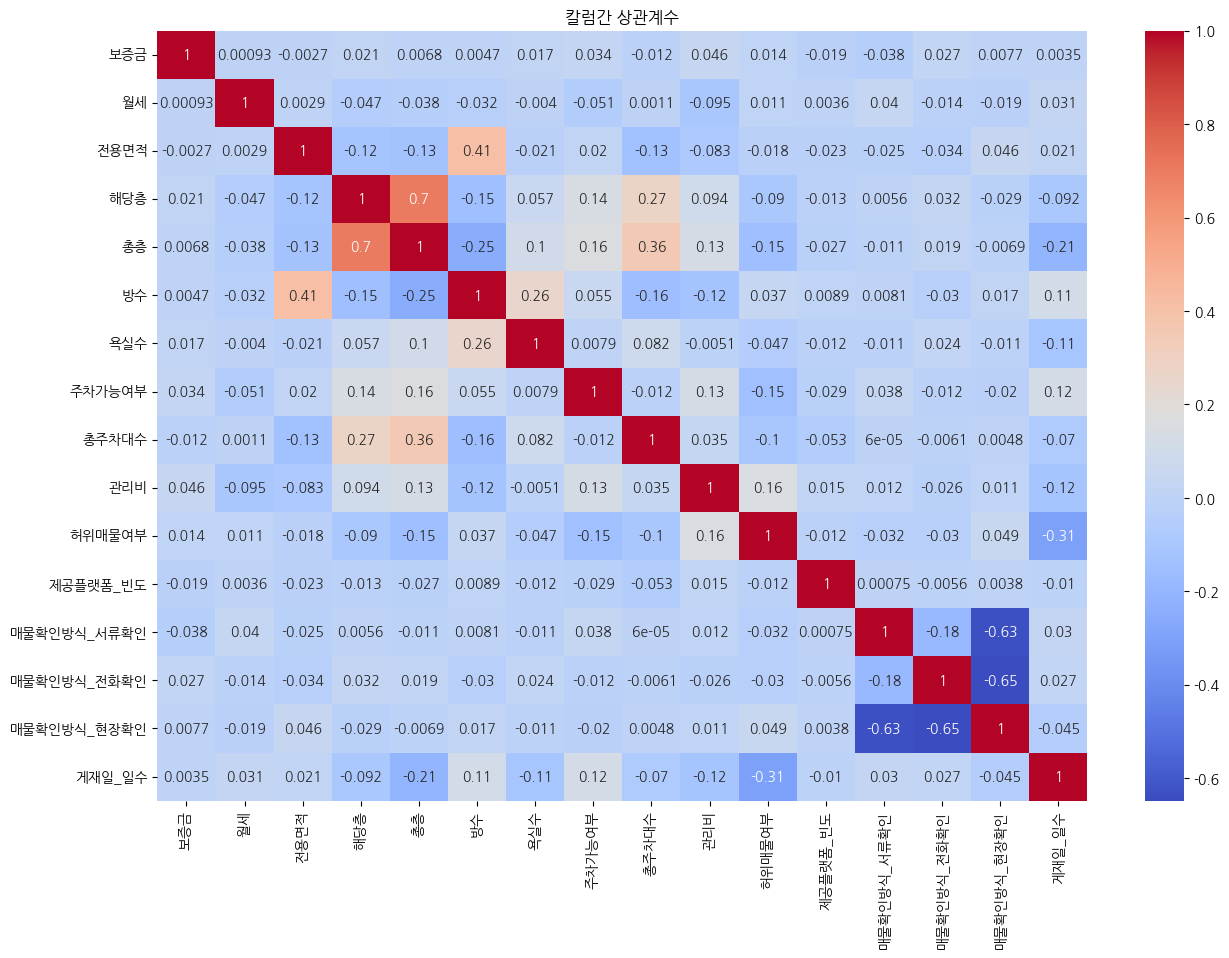

In [43]:
home_cleaned = home.dropna()
home_cleaned = home_cleaned.drop(columns=['방향','중개사무소','게재일'])
home_cleaned

correlation_matrix = home_cleaned.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('칼럼간 상관계수')
plt.show()

# home1, home2 각각 simpleimputer, KNNimputer로 결측치 채움

In [19]:
home1= home

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer #단순 평균,중위값 등을 사용

home1 = home
imputer = SimpleImputer(strategy='mean')
home1[['총주차대수']] = imputer.fit_transform(home1[['총주차대수']])
home1[['총층']] = imputer.fit_transform(home1[['총층']])

# 결측값 대체 확인
print("결측값 대체 후 데이터프레임:")
print(home1.isna().sum())  # NaN 개수 확인

# 2. 학습 데이터 준비
train_data = home1.dropna(subset=['총층', '총주차대수'])  # 두 칼럼 모두 값이 있는 행만 사용
if train_data.empty:
    raise ValueError("학습 데이터가 비어 있습니다. 결측값 처리가 제대로 되었는지 확인하세요.")

X_train = train_data[['총주차대수']]
y_train = train_data['총층']

# 3. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 총층의 NaN 값 예측
missing_total_floors = home1[home1['총층'].isna()]
if not missing_total_floors.empty:
    home1.loc[home1['총층'].isna(), '총층'] = model.predict(missing_total_floors[['총주차대수']])

print("\n예측 완료 후 데이터프레임:")
home1


결측값 대체 후 데이터프레임:
보증금              0
월세               0
전용면적           787
해당층            229
총층               0
방향               0
방수              16
욕실수             18
주차가능여부           0
총주차대수            0
관리비              0
중개사무소            0
게재일              0
허위매물여부           0
제공플랫폼_빈도         0
매물확인방식_서류확인      0
매물확인방식_전화확인      0
매물확인방식_현장확인      0
dtype: int64

예측 완료 후 데이터프레임:


,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일,허위매물여부,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
ID,,,,,,,,,,,,,,,,,,
TRAIN_1936,153000000.0,130000,NaN,4.0,7.0,북향,2.0,1.0,0.0,6.000000,15,O47hX9Z3L9,2023-04-28,1,958,0,0,1
TRAIN_1583,181000000.0,350000,NaN,2.0,3.0,북향,2.0,1.0,0.0,20.332574,7,R12sm8W4R0,2023-05-09,1,610,0,0,1
TRAIN_1831,165000000.0,140000,NaN,2.0,4.0,서향,1.0,1.0,0.0,3.000000,13,L43HH2L9R7,2023-06-09,1,610,0,0,1
TRAIN_1270,78500000.0,50000,NaN,2.0,3.0,서향,2.0,1.0,0.0,20.332574,3,A72Mx9C8U2,2023-06-21,1,610,0,0,1
TRAIN_1300,140500000.0,710000,NaN,5.0,6.0,서향,1.0,1.0,0.0,20.332574,14,S12iP7V0Q9,2023-06-23,1,958,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_0055,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,0.0,31.000000,4,G52Iz8V2B9,2025-03-02,0,958,0,1,0
TRAIN_2069,179000000.0,150000,29.93,5.0,6.0,남동향,2.0,1.0,1.0,5.000000,12,Y04yg0T7Z5,2025-03-03,0,610,0,0,1
TRAIN_0007,139500000.0,590000,NaN,2.0,3.0,동향,2.0,1.0,0.0,20.332574,0,d22DX4Y4P8,2025-03-03,0,610,0,0,1


In [21]:
import pandas as pd
from sklearn.impute import KNNImputer #특이점에 강한 KNN과 결측값 처리 가능 모델 활
from sklearn.ensemble import HistGradientBoostingRegressor

home2 = home[['총주차대수','총층']]

# 1. KNNImputer로 결측값 처리
imputer = KNNImputer(n_neighbors=3)
home2_imputed = pd.DataFrame(imputer.fit_transform(home2), columns=home2.columns)

# 2. 학습 데이터 분리
train_data = home2_imputed.dropna(subset=['총층', '총주차대수'])  # 학습 데이터 확인
if train_data.empty:
    raise ValueError("학습 데이터가 비어 있습니다. 결측값 처리가 제대로 되었는지 확인하세요.")

X_train = train_data[['총주차대수']]
y_train = train_data['총층']

# 3. 결측값 지원 모델로 학습
model = HistGradientBoostingRegressor()  # NaN을 지원하는 모델
model.fit(X_train, y_train)

# 4. 총층의 NaN 값 예측
missing_total_floors = home2[home2['총층'].isna()]
if not missing_total_floors.empty:
    home1.loc[home2['총층'].isna(), '총층'] = model.predict(missing_total_floors[['총주차대수']])

print("\n결측값 처리 완료 후 데이터프레임:")
home2



결측값 처리 완료 후 데이터프레임:


,총주차대수,총층
ID,,
TRAIN_1936,6.000000,7.0
TRAIN_1583,20.332574,3.0
TRAIN_1831,3.000000,4.0
TRAIN_1270,20.332574,3.0
TRAIN_1300,20.332574,6.0
...,...,...
TRAIN_0055,31.000000,5.0
TRAIN_2069,5.000000,6.0
TRAIN_0007,20.332574,3.0


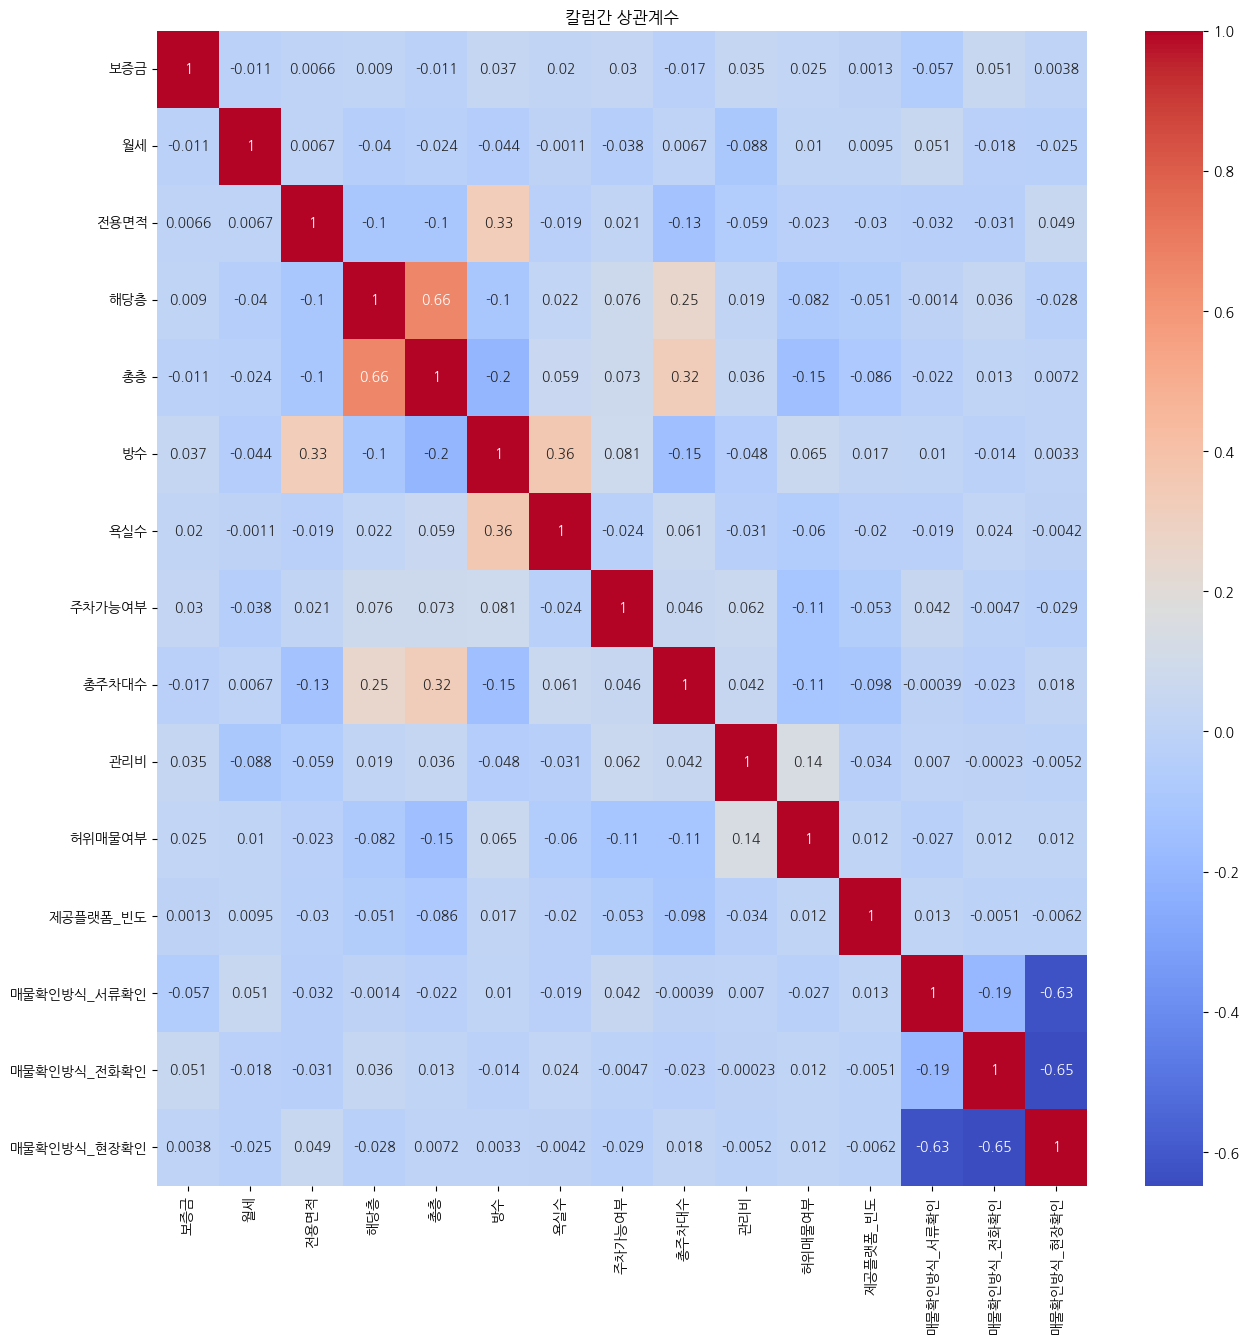

In [22]:
home_cleaned1 = home1.dropna()
home_cleaned1 = home_cleaned1.drop(columns=['방향','중개사무소','게재일'])
home_cleaned1

correlation_matrix1 = home_cleaned1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('칼럼간 상관계수')
plt.show()

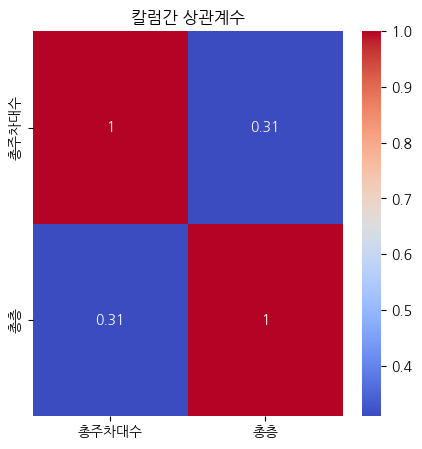

In [23]:
home_cleaned2 = home2.dropna()

correlation_matrix2 = home_cleaned2.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('칼럼간 상관계수')
plt.show()

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# 1. Imputer로 결측값 채우기
imputer = SimpleImputer(strategy='mean')  # 평균값으로 결측값 대체
home1[['욕실수']] = imputer.fit_transform(home1[['욕실수']])
home1[['방수']] = imputer.fit_transform(home1[['방수']])

# 2. 반복적으로 결측값 채우기
for _ in range(2):  # 반복 횟수를 적당히 설정
    # '방수' 결측값 채우기
    missing_bangsu = home1[home1['방수'].isna()]
    if not missing_bangsu.empty:
        train_data = home1.dropna(subset=['방수', '욕실수'])
        X_train = train_data[['욕실수']]
        y_train = train_data['방수']

        model = LinearRegression()
        model.fit(X_train, y_train)

        # 예측
        home1.loc[home1['방수'].isna(), '방수'] = model.predict(missing_bangsu[['욕실수']])

    # '욕실수' 결측값 채우기
    missing_bathrooms = home1[home1['욕실수'].isna()]
    if not missing_bathrooms.empty:
        train_data = home1.dropna(subset=['방수', '욕실수'])
        X_train = train_data[['방수']]
        y_train = train_data['욕실수']

        model = LinearRegression()
        model.fit(X_train, y_train)

        # 예측
        home1.loc[home1['욕실수'].isna(), '욕실수'] = model.predict(missing_bathrooms[['방수']])

# 결과 확인
print("결측값 채운 데이터프레임:")
home1.info()


결측값 채운 데이터프레임:
<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, TRAIN_1936 to TRAIN_2208
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   보증금          2452 non-null   float64
 1   월세           2452 non-null   int64  
 2   전용면적         1665 non-null   float64
 3   해당층          2223 non-null   float64
 4   총층           2452 non-null   float64
 5   방향           2452 non-null   object 
 6   방수           2452 non-null   float64
 7   욕실수          2452 non-null   float64
 8   주차가능여부       2452 non-null   float64
 9   총주차대수        2452 non-null   float64
 10  관리비          2452 non-null   int64  
 11  중개사무소        2452 non-null   object 
 12  게재일          2452 non-null   object 
 13  허위매물여부       2452 non-null   int64  
 14  제공플랫폼_빈도     2452 non-null   int64  
 15  매물확인방식_서류확인  2452 non-null   int64  
 16  매물확인방식_전화확인  2452 non-null   int64  
 17  매물확인방식_현장확인  2452 non-null   int64  
dtypes: float64(8), int64(7)

In [25]:
home2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, TRAIN_1936 to TRAIN_2208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총주차대수   2452 non-null   float64
 1   총층      2452 non-null   float64
dtypes: float64(2)
memory usage: 122.0+ KB


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

home2['욕실수'] = home['욕실수']
home2['방수'] = home['방수']
home2['전용면적'] = home['전용면적']
# 1. Imputer로 결측값 채우기
imputer = SimpleImputer(strategy='mean')  # 평균값으로 결측값 대체
home2[['욕실수']] = imputer.fit_transform(home2[['욕실수']])
home2[['방수']] = imputer.fit_transform(home2[['방수']])

# 2. 반복적으로 결측값 채우기
for _ in range(2):  # 반복 횟수를 적당히 설정
    # '방수' 결측값 채우기
    missing_bangsu = home2[home2['방수'].isna()]
    if not missing_bangsu.empty:
        train_data = home2.dropna(subset=['방수', '욕실수'])
        X_train = train_data[['욕실수']]
        y_train = train_data['방수']

        model = LinearRegression()
        model.fit(X_train, y_train)

        # 예측
        home2.loc[home2['방수'].isna(), '방수'] = model.predict(missing_bangsu[['욕실수']])

    # '욕실수' 결측값 채우기
    missing_bathrooms = home2[home2['욕실수'].isna()]
    if not missing_bathrooms.empty:
        train_data = home2.dropna(subset=['방수', '욕실수'])
        X_train = train_data[['방수']]
        y_train = train_data['욕실수']

        model = LinearRegression()
        model.fit(X_train, y_train)

        # 예측
        home2.loc[home2['욕실수'].isna(), '욕실수'] = model.predict(missing_bathrooms[['방수']])

# 결과 확인
print("결측값 채운 데이터프레임:")
home2.info()


결측값 채운 데이터프레임:
<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, TRAIN_1936 to TRAIN_2208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총주차대수   2452 non-null   float64
 1   총층      2452 non-null   float64
 2   욕실수     2452 non-null   float64
 3   방수      2452 non-null   float64
 4   전용면적    1665 non-null   float64
dtypes: float64(5)
memory usage: 179.5+ KB


<ipython-input-26-a449e64479d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home2['욕실수'] = home['욕실수']
<ipython-input-26-a449e64479d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home2['방수'] = home['방수']
<ipython-input-26-a449e64479d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# 1. '방수'의 결측값 처리
imputer = SimpleImputer(strategy='mean')
home1[['방수']] = imputer.fit_transform(home1[['방수']])

# 2. '전용면적' 결측값 채우기
# 학습 데이터 준비 (결측값 없는 데이터)
train_data = home1.dropna(subset=['방수', '전용면적'])
X_train = train_data[['방수']]
y_train = train_data['전용면적']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# '전용면적'의 NaN 값 예측
missing_area = home1[home1['전용면적'].isna()]
if not missing_area.empty:
    # 예측 수행
    predicted_areas = model.predict(missing_area[['방수']])
    home1.loc[home1['전용면적'].isna(), '전용면적'] = predicted_areas

# 결과 확인
print("결측값 채운 데이터프레임:")
home1.info()


결측값 채운 데이터프레임:
<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, TRAIN_1936 to TRAIN_2208
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   보증금          2452 non-null   float64
 1   월세           2452 non-null   int64  
 2   전용면적         2452 non-null   float64
 3   해당층          2223 non-null   float64
 4   총층           2452 non-null   float64
 5   방향           2452 non-null   object 
 6   방수           2452 non-null   float64
 7   욕실수          2452 non-null   float64
 8   주차가능여부       2452 non-null   float64
 9   총주차대수        2452 non-null   float64
 10  관리비          2452 non-null   int64  
 11  중개사무소        2452 non-null   object 
 12  게재일          2452 non-null   object 
 13  허위매물여부       2452 non-null   int64  
 14  제공플랫폼_빈도     2452 non-null   int64  
 15  매물확인방식_서류확인  2452 non-null   int64  
 16  매물확인방식_전화확인  2452 non-null   int64  
 17  매물확인방식_현장확인  2452 non-null   int64  
dtypes: float64(8), int64(7)

In [28]:
home1.columns

Index(['보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부', '총주차대수',
       '관리비', '중개사무소', '게재일', '허위매물여부', '제공플랫폼_빈도', '매물확인방식_서류확인',
       '매물확인방식_전화확인', '매물확인방식_현장확인'],
      dtype='object')

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# 1. '방수'의 결측값 처리
imputer = SimpleImputer(strategy='mean')
home2[['방수']] = imputer.fit_transform(home2[['방수']])

# 2. '전용면적' 결측값 채우기
# 학습 데이터 준비 (결측값 없는 데이터)
train_data = home2.dropna(subset=['방수', '전용면적'])
X_train = train_data[['방수']]
y_train = train_data['전용면적']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# '전용면적'의 NaN 값 예측
missing_area = home2[home2['전용면적'].isna()]
if not missing_area.empty:
    # 예측 수행
    predicted_areas = model.predict(missing_area[['방수']])
    home2.loc[home2['전용면적'].isna(), '전용면적'] = predicted_areas

# 결과 확인
print("결측값 채운 데이터프레임:")
home2.info()


결측값 채운 데이터프레임:
<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, TRAIN_1936 to TRAIN_2208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총주차대수   2452 non-null   float64
 1   총층      2452 non-null   float64
 2   욕실수     2452 non-null   float64
 3   방수      2452 non-null   float64
 4   전용면적    2452 non-null   float64
dtypes: float64(5)
memory usage: 179.5+ KB


<ipython-input-29-efb5008d2434>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home2[['방수']] = imputer.fit_transform(home2[['방수']])


In [30]:
import pandas as pd
from datetime import datetime

# 2. '게재일' 칼럼을 날짜 형식으로 변환
home1['게재일'] = pd.to_datetime(home1['게재일'])

# 3. 날짜를 특정 기준일로부터의 일수로 변환
reference_date = home1['게재일'].min()  # 기준일: 첫 번째 데이터 날짜
home1['게재일_일수'] = (home1['게재일'] - reference_date).dt.days
# 5. 필요에 따라 '게재일' 삭제
home1 = home1.drop(columns=['게재일'])

home1


,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,허위매물여부,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인,게재일_일수
ID,,,,,,,,,,,,,,,,,,
TRAIN_1936,153000000.0,130000,31.203638,4.0,7.0,북향,2.0,1.0,0.0,6.000000,15,O47hX9Z3L9,1,958,0,0,1,0
TRAIN_1583,181000000.0,350000,31.203638,2.0,3.0,북향,2.0,1.0,0.0,20.332574,7,R12sm8W4R0,1,610,0,0,1,11
TRAIN_1831,165000000.0,140000,25.078175,2.0,4.0,서향,1.0,1.0,0.0,3.000000,13,L43HH2L9R7,1,610,0,0,1,42
TRAIN_1270,78500000.0,50000,31.203638,2.0,3.0,서향,2.0,1.0,0.0,20.332574,3,A72Mx9C8U2,1,610,0,0,1,54
TRAIN_1300,140500000.0,710000,25.078175,5.0,6.0,서향,1.0,1.0,0.0,20.332574,14,S12iP7V0Q9,1,958,0,0,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_0055,172000000.0,580000,27.160000,2.0,5.0,북향,1.0,1.0,0.0,31.000000,4,G52Iz8V2B9,0,958,0,1,0,674
TRAIN_2069,179000000.0,150000,29.930000,5.0,6.0,남동향,2.0,1.0,1.0,5.000000,12,Y04yg0T7Z5,0,610,0,0,1,675
TRAIN_0007,139500000.0,590000,31.203638,2.0,3.0,동향,2.0,1.0,0.0,20.332574,0,d22DX4Y4P8,0,610,0,0,1,675


# test셋에도 동일 전처리

In [31]:
files.upload()

Saving test.csv to test.csv


{'test.csv': b'ID,\xeb\xa7\xa4\xeb\xac\xbc\xed\x99\x95\xec\x9d\xb8\xeb\xb0\xa9\xec\x8b\x9d,\xeb\xb3\xb4\xec\xa6\x9d\xea\xb8\x88,\xec\x9b\x94\xec\x84\xb8,\xec\xa0\x84\xec\x9a\xa9\xeb\xa9\xb4\xec\xa0\x81,\xed\x95\xb4\xeb\x8b\xb9\xec\xb8\xb5,\xec\xb4\x9d\xec\xb8\xb5,\xeb\xb0\xa9\xed\x96\xa5,\xeb\xb0\xa9\xec\x88\x98,\xec\x9a\x95\xec\x8b\xa4\xec\x88\x98,\xec\xa3\xbc\xec\xb0\xa8\xea\xb0\x80\xeb\x8a\xa5\xec\x97\xac\xeb\xb6\x80,\xec\xb4\x9d\xec\xa3\xbc\xec\xb0\xa8\xeb\x8c\x80\xec\x88\x98,\xea\xb4\x80\xeb\xa6\xac\xeb\xb9\x84,\xec\xa4\x91\xea\xb0\x9c\xec\x82\xac\xeb\xac\xb4\xec\x86\x8c,\xec\xa0\x9c\xea\xb3\xb5\xed\x94\x8c\xeb\x9e\xab\xed\x8f\xbc,\xea\xb2\x8c\xec\x9e\xac\xec\x9d\xbc\nTEST_000,\xec\x84\x9c\xeb\xa5\x98\xed\x99\x95\xec\x9d\xb8,223000000.0,530000,,5.0,5.0,\xeb\x82\xa8\xed\x96\xa5,1.0,1.0,\xeb\xb6\x88\xea\xb0\x80\xeb\x8a\xa5,,7,Z86Th6S3K5,D\xed\x94\x8c\xeb\x9e\xab\xed\x8f\xbc,2024-10-21\nTEST_001,\xec\x84\x9c\xeb\xa5\x98\xed\x99\x95\xec\x9d\xb8,150500000.0,590000,30.26,7.0,11.0,\xec\x

In [32]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer #단순 평균,중위값 등을 사용

imputer = SimpleImputer(strategy='mean')
test[['총주차대수']] = imputer.fit_transform(test[['총주차대수']])
test[['총층']] = imputer.fit_transform(test[['총층']])

# 2. 학습 데이터 준비
train_data = test.dropna(subset=['총층', '총주차대수'])  # 두 칼럼 모두 값이 있는 행만 사용
if train_data.empty:
    raise ValueError("학습 데이터가 비어 있습니다. 결측값 처리가 제대로 되었는지 확인하세요.")

X_train = train_data[['총주차대수']]
y_train = train_data['총층']

# 3. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 총층의 NaN 값 예측
missing_total_floors = test[test['총층'].isna()]
if not missing_total_floors.empty:
    test.loc[test['총층'].isna(), '총층'] = model.predict(missing_total_floors[['총주차대수']])

print("\n예측 완료 후 데이터프레임:")

# 1. Imputer로 결측값 채우기
imputer = SimpleImputer(strategy='mean')  # 평균값으로 결측값 대체
test[['욕실수']] = imputer.fit_transform(test[['욕실수']])
test[['방수']] = imputer.fit_transform(test[['방수']])

# 2. 반복적으로 결측값 채우기
for _ in range(2):  # 반복 횟수를 적당히 설정
    # '방수' 결측값 채우기
    missing_bangsu = test[test['방수'].isna()]
    if not missing_bangsu.empty:
        train_data = test.dropna(subset=['방수', '욕실수'])
        X_train = train_data[['욕실수']]
        y_train = train_data['방수']

        model = LinearRegression()
        model.fit(X_train, y_train)

        # 예측
        test.loc[test['방수'].isna(), '방수'] = model.predict(missing_bangsu[['욕실수']])

    # '욕실수' 결측값 채우기
    missing_bathrooms = test[test['욕실수'].isna()]
    if not missing_bathrooms.empty:
        train_data = test.dropna(subset=['방수', '욕실수'])
        X_train = train_data[['방수']]
        y_train = train_data['욕실수']

        model = LinearRegression()
        model.fit(X_train, y_train)

        # 예측
        test.loc[test['욕실수'].isna(), '욕실수'] = model.predict(missing_bathrooms[['방수']])

# 결과 확인
print("결측값 채운 데이터프레임:")

# 1. '방수'의 결측값 처리
imputer = SimpleImputer(strategy='mean')
test[['방수']] = imputer.fit_transform(test[['방수']])

# 2. '전용면적' 결측값 채우기
# 학습 데이터 준비 (결측값 없는 데이터)
train_data = test.dropna(subset=['방수', '전용면적'])
X_train = train_data[['방수']]
y_train = train_data['전용면적']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# '전용면적'의 NaN 값 예측
missing_area = test[test['전용면적'].isna()]
if not missing_area.empty:
    # 예측 수행
    predicted_areas = model.predict(missing_area[['방수']])
    test.loc[test['전용면적'].isna(), '전용면적'] = predicted_areas

# 결과 확인
print("결측값 채운 데이터프레임:")
from datetime import datetime

# 2. '게재일' 칼럼을 날짜 형식으로 변환
test['게재일'] = pd.to_datetime(test['게재일'])

# 3. 날짜를 특정 기준일로부터의 일수로 변환
reference_date = test['게재일'].min()  # 기준일: 첫 번째 데이터 날짜
test['게재일_일수'] = (test['게재일'] - reference_date).dt.days
# 5. 필요에 따라 '게재일' 삭제
test = test.drop(columns=['게재일'])

test


예측 완료 후 데이터프레임:
결측값 채운 데이터프레임:
결측값 채운 데이터프레임:


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일_일수
0,TEST_000,서류확인,223000000.0,530000,25.495214,5.0,5.0,남향,1.0,1.0,불가능,20.292237,7,Z86Th6S3K5,D플랫폼,490
1,TEST_001,서류확인,150500000.0,590000,30.260000,7.0,11.0,서향,1.0,1.0,불가능,16.000000,11,G52Iz8V2B9,D플랫폼,75
2,TEST_002,현장확인,47000000.0,200000,41.500000,2.0,3.0,남서향,2.0,1.0,불가능,20.292237,0,N45gM0M7R0,B플랫폼,289
3,TEST_003,서류확인,133000000.0,250000,31.350000,5.0,6.0,남향,2.0,1.0,가능,20.292237,5,C41wx1K6U9,B플랫폼,458
4,TEST_004,현장확인,108000000.0,380000,23.140000,2.0,3.0,남향,1.0,1.0,불가능,20.292237,0,Z68ZJ6F6L4,A플랫폼,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,TEST_608,현장확인,152500000.0,340000,30.830000,4.0,6.0,남동향,1.0,1.0,가능,1.000000,2,j90UQ8N6M3,A플랫폼,463
609,TEST_609,전화확인,226500000.0,750000,29.880000,NaN,10.0,남서향,2.0,1.0,가능,34.000000,7,r82ax9M3U3,B플랫폼,443
610,TEST_610,현장확인,169500000.0,500000,30.730000,5.0,6.0,남향,1.0,1.0,불가능,33.000000,6,G52Iz8V2B9,F플랫폼,306
611,TEST_611,현장확인,180000000.0,340000,17.500000,3.0,6.0,남동향,1.0,1.0,가능,2.000000,8,J52gJ2E4T6,C플랫폼,517


In [34]:
home_one_hot = pd.get_dummies(test, columns=['매물확인방식'], prefix='매물확인방식', dtype=int)

platform_frequency_map = test['제공플랫폼'].value_counts().to_dict()
test['제공플랫폼_빈도'] = test['제공플랫폼'].map(platform_frequency_map)
test = pd.merge(test, home_one_hot)
from sklearn.preprocessing import MinMaxScaler

test['주차가능여부'] = test['주차가능여부'].map({'가능': 1, '불가능': 0})
scaler = MinMaxScaler()
test[['주차가능여부']] = scaler.fit_transform(test[['주차가능여부']])
test = test.drop(columns=['매물확인방식','제공플랫폼'])
test = test.set_index('ID')
test

,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일_일수,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
ID,,,,,,,,,,,,,,,,,
TEST_000,223000000.0,530000,25.495214,5.0,5.0,남향,1.0,1.0,0.0,20.292237,7,Z86Th6S3K5,490,45,1,0,0
TEST_001,150500000.0,590000,30.260000,7.0,11.0,서향,1.0,1.0,0.0,16.000000,11,G52Iz8V2B9,75,45,1,0,0
TEST_002,47000000.0,200000,41.500000,2.0,3.0,남서향,2.0,1.0,0.0,20.292237,0,N45gM0M7R0,289,164,0,0,1
TEST_003,133000000.0,250000,31.350000,5.0,6.0,남향,2.0,1.0,1.0,20.292237,5,C41wx1K6U9,458,164,1,0,0
TEST_004,108000000.0,380000,23.140000,2.0,3.0,남향,1.0,1.0,0.0,20.292237,0,Z68ZJ6F6L4,510,244,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_608,152500000.0,340000,30.830000,4.0,6.0,남동향,1.0,1.0,1.0,1.000000,2,j90UQ8N6M3,463,244,0,0,1
TEST_609,226500000.0,750000,29.880000,NaN,10.0,남서향,2.0,1.0,1.0,34.000000,7,r82ax9M3U3,443,164,0,1,0
TEST_610,169500000.0,500000,30.730000,5.0,6.0,남향,1.0,1.0,0.0,33.000000,6,G52Iz8V2B9,306,21,0,0,1


# 로지스틱회귀분석

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Train 데이터 준비
X_train = home1.drop(columns=['허위매물여부', '방향', '중개사무소'])  # '허위매물여부'는 타겟, '방향', '중개사무소' 제외
y_train = home1['허위매물여부']

# 2. Train 데이터 전처리
# 결측값 처리
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# 스케일링
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# 3. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 칼럼 순서 맞추기
X_test = test[X_train.columns]

# 5. Test 데이터 전처리
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)  # Train의 imputer 재사용
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)  # Train의 scaler 재사용

# 6. Test 데이터 예측
y_pred = model.predict(X_test)

# 7. 결과 출력
print("Test 데이터 예측 결과 (허위매물여부):", y_pred)


Test 데이터 예측 결과 (허위매물여부): [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0


In [37]:
test

,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일_일수,제공플랫폼_빈도,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
ID,,,,,,,,,,,,,,,,,
TEST_000,223000000.0,530000,25.495214,5.0,5.0,남향,1.0,1.0,0.0,20.292237,7,Z86Th6S3K5,490,45,1,0,0
TEST_001,150500000.0,590000,30.260000,7.0,11.0,서향,1.0,1.0,0.0,16.000000,11,G52Iz8V2B9,75,45,1,0,0
TEST_002,47000000.0,200000,41.500000,2.0,3.0,남서향,2.0,1.0,0.0,20.292237,0,N45gM0M7R0,289,164,0,0,1
TEST_003,133000000.0,250000,31.350000,5.0,6.0,남향,2.0,1.0,1.0,20.292237,5,C41wx1K6U9,458,164,1,0,0
TEST_004,108000000.0,380000,23.140000,2.0,3.0,남향,1.0,1.0,0.0,20.292237,0,Z68ZJ6F6L4,510,244,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_608,152500000.0,340000,30.830000,4.0,6.0,남동향,1.0,1.0,1.0,1.000000,2,j90UQ8N6M3,463,244,0,0,1
TEST_609,226500000.0,750000,29.880000,NaN,10.0,남서향,2.0,1.0,1.0,34.000000,7,r82ax9M3U3,443,164,0,1,0
TEST_610,169500000.0,500000,30.730000,5.0,6.0,남향,1.0,1.0,0.0,33.000000,6,G52Iz8V2B9,306,21,0,0,1


In [40]:
y_pred1 = y_pred.reshape(-1, 1)
y_pred1 = pd.DataFrame(y_pred1, columns=['허위매물여부'])
y_pred1
test1 = test
test1 = test1.reset_index()
id = test1['ID']
y_pred1['ID'] = id
y_pred1

,허위매물여부,ID
0,0,TEST_000
1,1,TEST_001
2,0,TEST_002
3,0,TEST_003
4,0,TEST_004
...,...,...
608,0,TEST_608
609,0,TEST_609
610,0,TEST_610
611,0,TEST_611


In [41]:
# 원하는 칼럼 순서대로 리스트 생성
new_column_order = ['ID', '허위매물여부']

# 칼럼 순서 변경
y_pred1 = y_pred1[new_column_order]

In [42]:
y_pred1

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,1
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
608,TEST_608,0
609,TEST_609,0
610,TEST_610,0
611,TEST_611,0


In [ ]:
import pandas as pd

# y_pred를 DataFrame으로 변환
y_pred_df = pd.DataFrame(y_pred1, columns=['ID','허위매물여부'])

# CSV 파일로 저장
y_pred_df.to_csv('y_pred_results.csv', index=False)

print("y_pred 결과가 'y_pred_results.csv' 파일로 저장되었습니다.")


In [ ]:
y_pred1 = pd.DataFrame(y_pred, columns=['허위매물여부'])
y_pred1['허위매물여부'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
!pip install koreanize_matplotlib
import koreanize_matplotlib

In [ ]:
correlation = home['보증금(만원)'].corr(home['총월세'])
print("보증금과 월세의 상관계수:", correlation)

# 산점도 시각화
plt.scatter(home['보증금(만원)'], home['총월세'], alpha=0.7, color='blue')
plt.title('보증금과 월세의 관계')
plt.xlabel('보증금')
plt.ylabel('월세')
plt.grid(True)
plt.show()

In [ ]:
home1.query('총월세 > 100')[['총월세','허위매물여부']]

In [ ]:
home1 = home
home1['보증금_대비_월세'] = home1['총월세'] / home1['보증금(만원)']

# 비율 확인
print(home1[['보증금(만원)', '총월세', '보증금_대비_월세']])

# 비율 히스토그램 시각화
home1['보증금_대비_월세'].hist(bins=10, color='orange', alpha=0.7)
plt.title('보증금 대비 월세 비율 분포')
plt.xlabel('보증금 대비 월세 비율')
plt.ylabel('빈도')
plt.show()

In [ ]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(home1['보증금(만원)'], home1['총월세'])
print("스피어만 상관계수:", spearman_corr)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
home1['클러스터'] = kmeans.fit_predict(home1[['보증금(만원)', '총월세']])

In [ ]:
home1['클러스터'].value_counts()